In [1]:
#info val over ratio of weight
#small dataset
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
G=nx.Graph()
init_links=[]

In [3]:
def initiate():
    #converting text to list of edges
    edge_list=[]
    f=open("example.txt","r")
    for line in f:
        spl=line.split()
        spl = [int(i) for i in spl]
        edge_list.append(spl)
    for i in range(len(edge_list)):
        if edge_list[i][0]>900 and edge_list[i][0]<950 and edge_list[i][1]>900 and edge_list[i][1]<950:
            G.add_edge(edge_list[i][0],edge_list[i][1])
    G.add_edge(901,931)
    G.add_edge(939,907)
    G.add_edge(939,924)
    G.add_edge(939,907)
    G.add_edge(920,914)
    G.add_edge(939,907)
    G.add_edge(922,907)
    G.add_edge(922,919)
    G.add_edge(940,945)
    G.add_edge(940,945)
    G.add_edge(912,901)

In [4]:
initiate()

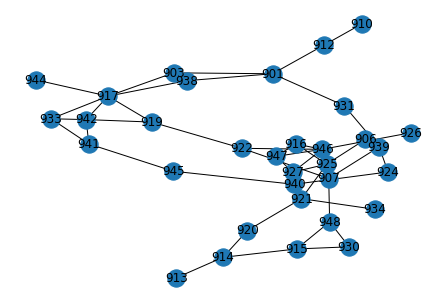

In [5]:
nx.draw(G,with_labels=True)
plt.show()

In [6]:
betCent=nx.betweenness_centrality(G,normalized=True,endpoints=True)
sorted(betCent, key=betCent.get, reverse=True)[:5]

[922, 946, 907, 919, 917]

In [7]:
eigenCent=nx.eigenvector_centrality(G,max_iter=1000)
sorted(eigenCent,key=eigenCent.get,reverse=True)[:5]

[946, 925, 927, 916, 947]

In [8]:
degCent=nx.degree_centrality(G)
sorted(degCent,key=degCent.get,reverse=True)[:5]

[917, 946, 925, 901, 942]

In [9]:
x=0
link_pred={}
link_adamic_adar=[]
preds=nx.adamic_adar_index(G)
#print(preds)
for u,v,p in preds:
    sp=(min(u,v),max(u,v))
    link_pred[sp]=p
    if p>0:
        x+=1
print(x)
s=sorted(link_pred,key=link_pred.get,reverse=True)
for i in range(len(link_pred)):
    if(link_pred[s[i]]>0):
        link_adamic_adar.append(list(s[i]))
def sortFirst(val):
    return val[0]
link_adamic_adar.sort(key=sortFirst)
set1=set(tuple(i) for i in link_adamic_adar)

70


In [10]:
set1

{(901, 910),
 (901, 917),
 (901, 939),
 (903, 912),
 (903, 919),
 (903, 931),
 (903, 933),
 (903, 938),
 (903, 942),
 (903, 944),
 (906, 916),
 (906, 921),
 (906, 927),
 (906, 946),
 (907, 915),
 (907, 919),
 (907, 924),
 (907, 930),
 (907, 931),
 (907, 946),
 (912, 931),
 (912, 938),
 (913, 915),
 (913, 920),
 (914, 921),
 (914, 930),
 (914, 948),
 (915, 920),
 (916, 921),
 (916, 922),
 (916, 926),
 (916, 927),
 (917, 922),
 (917, 941),
 (919, 933),
 (919, 938),
 (919, 941),
 (919, 944),
 (919, 946),
 (920, 925),
 (920, 927),
 (920, 934),
 (921, 946),
 (921, 947),
 (922, 925),
 (922, 926),
 (922, 927),
 (922, 939),
 (922, 942),
 (922, 947),
 (922, 948),
 (924, 931),
 (924, 945),
 (925, 926),
 (925, 934),
 (925, 947),
 (926, 927),
 (926, 947),
 (927, 934),
 (931, 938),
 (933, 938),
 (933, 944),
 (933, 945),
 (938, 942),
 (938, 944),
 (939, 940),
 (939, 948),
 (940, 941),
 (942, 944),
 (942, 945)}

In [11]:
link_pred_adam={}
for i in range(len(link_pred)):
    link_pred_adam[s[i]]=link_pred[s[i]]
link_pred_adam

{(901, 917): 2.8853900817779268,
 (925, 947): 2.1896973736225664,
 (916, 927): 2.0896847877376965,
 (917, 941): 1.631586747071319,
 (901, 910): 1.4426950408889634,
 (901, 939): 1.4426950408889634,
 (914, 921): 1.4426950408889634,
 (924, 945): 1.4426950408889634,
 (939, 940): 1.4426950408889634,
 (940, 941): 1.4426950408889634,
 (921, 946): 1.3426824550040934,
 (903, 938): 1.279458146995729,
 (919, 933): 1.279458146995729,
 (907, 915): 0.9102392266268373,
 (907, 919): 0.9102392266268373,
 (907, 924): 0.9102392266268373,
 (907, 930): 0.9102392266268373,
 (907, 931): 0.9102392266268373,
 (907, 946): 0.9102392266268373,
 (913, 915): 0.9102392266268373,
 (913, 920): 0.9102392266268373,
 (914, 930): 0.9102392266268373,
 (914, 948): 0.9102392266268373,
 (915, 920): 0.9102392266268373,
 (917, 922): 0.9102392266268373,
 (919, 946): 0.9102392266268373,
 (922, 939): 0.9102392266268373,
 (922, 942): 0.9102392266268373,
 (922, 948): 0.9102392266268373,
 (924, 931): 0.9102392266268373,
 (933, 945): 

In [12]:
x

70

In [13]:
#G.edges(data=True)

In [14]:
def addEdgeWeight(x,y):
    weight=1
    for i in nx.common_neighbors(G,x,y):
        weight+=1/G.degree(i)
    return weight

In [15]:
#for updating and assigning weight to the network#
def weightAssign():
    for i in G.edges():
        attrs={(i[0],i[1]):{'weight':addEdgeWeight(i[0],i[1])}}
        nx.set_edge_attributes(G,attrs)
weightAssign()

In [16]:
G.edges(data=True)

EdgeDataView([(901, 903, {'weight': 1}), (901, 938, {'weight': 1}), (901, 931, {'weight': 1}), (901, 912, {'weight': 1}), (903, 917, {'weight': 1}), (938, 917, {'weight': 1}), (917, 919, {'weight': 1.25}), (917, 933, {'weight': 1.25}), (917, 942, {'weight': 1.6666666666666665}), (917, 944, {'weight': 1}), (906, 925, {'weight': 1}), (925, 916, {'weight': 1.1666666666666667}), (925, 921, {'weight': 1.25}), (925, 927, {'weight': 1.4166666666666667}), (925, 946, {'weight': 1.5833333333333333}), (907, 948, {'weight': 1}), (907, 939, {'weight': 1}), (907, 922, {'weight': 1}), (948, 915, {'weight': 1.5}), (948, 930, {'weight': 1.3333333333333333}), (910, 912, {'weight': 1}), (913, 914, {'weight': 1}), (914, 915, {'weight': 1}), (914, 920, {'weight': 1}), (915, 930, {'weight': 1.3333333333333333}), (916, 946, {'weight': 1.5333333333333332}), (916, 947, {'weight': 1.1666666666666667}), (946, 922, {'weight': 1}), (946, 926, {'weight': 1}), (946, 927, {'weight': 1.5333333333333332}), (946, 947, {

In [17]:
#this list is used to conquere recursion
init_nodes=[]

In [18]:
#spread is working,let's work around
def spread(node_id,info_id):
    for i in list(G.neighbors(node_id)):
        info=G.edges[i,node_id]['weight']#weight bhejenge
        info_val=(G.nodes[node_id][info_id][2])/(len(list(G.neighbors(node_id))))#yha info_val bhejenge
        if(i!=info_id):
            info_receive(node_id,i,info_id,info,info_val)
            if i not in init_nodes:
                init_nodes.append(i)
    while(len(init_nodes)!=0):
        receiver_id=init_nodes.pop()
        info=G.nodes[receiver_id][info_id][0]
        total_weight_sum=0
        for i in G.neighbors(receiver_id):
            total_weight_sum+=G.edges[i,receiver_id]['weight']
        if((info/total_weight_sum)>=0.27 and total_weight_sum!=0 and G.nodes[receiver_id][info_id][1]==False):
            G.nodes[receiver_id][info_id][1]=True
            spread(receiver_id,info_id)

In [19]:
#working and checked
#threshold to be set
def info_receive(sender_id,receiver_id,info_id,info,info_val):
    if(info_id not in G.nodes[receiver_id].keys()): #check if info_id pre-exist
        #first list to store info_id,info,state
        list_info=[info,False,info_val]
        attr={receiver_id:{info_id:list_info}}
        nx.set_node_attributes(G,attr)
        total_weight_sum=0
        if(G.has_edge(info_id,receiver_id)==False and G.nodes[receiver_id][info_id][2]>0.025 and [min(info_id,receiver_id),max(info_id,receiver_id)] not in init_links):
            #G.add_edge(info_id,receiver_id)
            #weightAssign()
            init_links.append([min(info_id,receiver_id),max(info_id,receiver_id)])
    else:
        info=G.nodes[receiver_id][info_id][0]+G.edges[sender_id,receiver_id]['weight'] #has to be replaced with 
        info_val+=G.nodes[receiver_id][info_id][2]
        list_info=[info,G.nodes[receiver_id][info_id][1],info_val]
        attr={receiver_id:{info_id:list_info}}
        nx.set_node_attributes(G,attr)
        total_weight_sum=0
        if(G.has_edge(info_id,receiver_id)==False and G.nodes[receiver_id][info_id][2]>0.025 and [min(info_id,receiver_id),max(info_id,receiver_id)] not in init_links):
            #G.add_edge(info_id,receiver_id)
            #weightAssign()
            init_links.append([min(info_id,receiver_id),max(info_id,receiver_id)])

In [20]:
#sare kaam yha honge
for i in G.nodes:
    list_info=[0,False,1]
    attr={i:{i:list_info}}
    nx.set_node_attributes(G,attr)
    spread(i,i)

In [21]:
init_links

[[901, 910],
 [901, 939],
 [901, 907],
 [901, 924],
 [901, 940],
 [901, 917],
 [917, 941],
 [912, 917],
 [917, 922],
 [920, 925],
 [925, 934],
 [925, 947],
 [922, 925],
 [925, 926],
 [914, 925],
 [907, 946],
 [907, 919],
 [907, 917],
 [907, 942],
 [907, 931],
 [907, 924],
 [907, 940],
 [907, 945],
 [907, 941],
 [914, 948],
 [913, 948],
 [920, 948],
 [921, 948],
 [939, 948],
 [922, 948],
 [946, 948],
 [919, 948],
 [931, 948],
 [924, 948],
 [913, 915],
 [913, 920],
 [913, 921],
 [914, 921],
 [907, 915],
 [915, 939],
 [915, 922],
 [915, 920],
 [915, 921],
 [907, 930],
 [930, 939],
 [922, 930],
 [914, 930],
 [913, 930],
 [920, 930],
 [921, 930],
 [916, 927],
 [916, 922],
 [916, 926],
 [916, 921],
 [907, 916],
 [916, 919],
 [906, 916],
 [916, 920],
 [916, 934],
 [921, 946],
 [906, 946],
 [920, 946],
 [919, 946],
 [917, 946],
 [942, 946],
 [939, 946],
 [922, 947],
 [926, 947],
 [921, 947],
 [907, 947],
 [919, 947],
 [906, 947],
 [920, 947],
 [934, 947],
 [914, 947],
 [919, 939],
 [919, 933],

In [22]:
set2=set(tuple(i) for i in init_links)
len(set2)

134

In [23]:
set2

{(901, 907),
 (901, 910),
 (901, 917),
 (901, 919),
 (901, 922),
 (901, 924),
 (901, 933),
 (901, 939),
 (901, 940),
 (901, 942),
 (901, 945),
 (903, 919),
 (903, 922),
 (903, 931),
 (903, 933),
 (903, 942),
 (906, 916),
 (906, 927),
 (906, 946),
 (906, 947),
 (907, 915),
 (907, 916),
 (907, 917),
 (907, 919),
 (907, 924),
 (907, 930),
 (907, 931),
 (907, 940),
 (907, 941),
 (907, 942),
 (907, 945),
 (907, 946),
 (907, 947),
 (910, 931),
 (912, 917),
 (912, 924),
 (912, 931),
 (913, 915),
 (913, 920),
 (913, 921),
 (913, 930),
 (913, 948),
 (914, 921),
 (914, 925),
 (914, 927),
 (914, 930),
 (914, 947),
 (914, 948),
 (915, 920),
 (915, 921),
 (915, 922),
 (915, 939),
 (916, 919),
 (916, 920),
 (916, 921),
 (916, 922),
 (916, 926),
 (916, 927),
 (916, 934),
 (917, 922),
 (917, 924),
 (917, 931),
 (917, 940),
 (917, 941),
 (917, 945),
 (917, 946),
 (919, 924),
 (919, 933),
 (919, 938),
 (919, 939),
 (919, 940),
 (919, 941),
 (919, 944),
 (919, 945),
 (919, 946),
 (919, 947),
 (919, 948),

In [24]:
len(set1.intersection(set2))

62

In [25]:
len(set1.union(set2))

142